In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.cm as cm
from matplotlib import ticker, cm


import string


import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
#from ipywidgets import interactive

In [3]:
import os

files = os.listdir('/work/mh0735/m219002/mz4_plastic_6sp_2050/hist/')
files.sort()
print(files)

path='/work/mh0735/m219002/mz4_plastic_6sp_2050/hist/'

for i in range(12):

    locals()['MP'+str(i+1)]=xr.open_dataset(path+files[i],decode_times=False)

['MZ4_plastic_6sp.mz4.h0.2013-01.nc', 'MZ4_plastic_6sp.mz4.h0.2013-02.nc', 'MZ4_plastic_6sp.mz4.h0.2013-03.nc', 'MZ4_plastic_6sp.mz4.h0.2013-04.nc', 'MZ4_plastic_6sp.mz4.h0.2013-05.nc', 'MZ4_plastic_6sp.mz4.h0.2013-06.nc', 'MZ4_plastic_6sp.mz4.h0.2013-07.nc', 'MZ4_plastic_6sp.mz4.h0.2013-08.nc', 'MZ4_plastic_6sp.mz4.h0.2013-09.nc', 'MZ4_plastic_6sp.mz4.h0.2013-10.nc', 'MZ4_plastic_6sp.mz4.h0.2013-11.nc', 'MZ4_plastic_6sp.mz4.h0.2013-12.nc']


In [5]:
    MP = [MP1,MP2
          ,MP3,MP4
          ,MP5,MP6,MP7,MP8,MP9,MP10,MP11,MP12
          #,MP13,MP14,MP15,MP16,MP17,MP18,MP19,MP20,MP21,MP22,MP23,MP24,MP25,MP26,MP27,MP28,MP29,MP30,MP31,MP32,MP33,MP34,MP35,MP36
         ]

In [6]:
vars=list(MP1.keys())

#print(vars.index('Plast01_SRF_EMIS_avrg'))

#print(vars.index('Plast01_DRY_DEP_FLX_avrg'))

#print(vars.index('Plast01_WETDEP_FLUX_avrg'))

emis=vars[34:40]
drys=vars[40:46]
wets=vars[46:52]
mass = vars[28:34]
months=[0,4,9,11
        #15,20,25,30,35
       ]

d = [0.5, 1.5, 5, 10, 35, 70]

In [7]:
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [8]:
def area_grid(lat, lon):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import meshgrid, deg2rad, gradient, cos
    from xarray import DataArray

    xlon, ylat = meshgrid(lon, lat)
    R = 6371000

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))
    

    area = dy * dx
    


    xda = DataArray(
        area,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        attrs={
        "long_name": "area_per_pixel",
        "description": "area per pixel",
        "units": "m^2",
        },
    )
    return xda

area = area_grid(MP1['lat'],MP1['lon'])

area.to_netcdf('area.nc')

area[0]=1.0
#area[383]=1.0

In [9]:
pop = xr.open_dataset('../../../data/pop1.nc',decode_times=False)
pop.fillna(0)
pop = pop['population']

FileNotFoundError: [Errno 2] No such file or directory: '/home/m/m300814/python_code/plot/data/pop1.nc'

In [10]:
import math
m=[]
for i in range(6):
    m.append(math.pi*d[i]**3/6*1e-6)
print(m)

[6.544984694978735e-08, 1.7671458676442586e-06, 6.544984694978735e-05, 0.0005235987755982988, 0.022449297503777062, 0.1795943800302165]


In [11]:
    for j in range(6):
        
        locals()['data0'+str(j)] = MP11[mass[j]][0,47,:,:]*1.27*1e9
        

    data0=data00+data01+data02+data03+data04+data05
        
    lev_exp0 = np.arange(np.floor(np.log2(3e-4)-1),
                  np.ceil(np.log2(1)+1))

    levs2 = np.exp(np.log(2) * lev_exp0)


In [12]:
    for j in range(6):
        
        locals()['data1'+str(j)] = MP11[mass[j]][0,47,:,:]*1.27*1e9/m[j]

    data1=data10+data11+data12+data13+data14+data15
        

    clev = np.arange(0,80000,1000)

In [13]:
for j in range(6):
        
    locals()['data2'+str(j)] = MP11[mass[j]][0,:,:,0]
        
    for x in range(1,570,20):
            
        locals()['data2'+str(j)] = locals()['data2'+str(j)]+MP[i][mass[j]][0,:,:,x]
    locals()['data2'+str(j)]= locals()['data2'+str(j)]/31*1.27*1e9
data2=data20+data21+data22+data23+data24+data25
        
 #   lev_exp = np.arange(np.floor(np.log10(1e-4)-1),
  #                np.ceil(np.log10(1e-1)+1))

   # levs2 = np.exp(np.log(10) * lev_exp)

al=[32.03953529,
 30.69653801,
 29.37452462,
 28.07349283,
 26.79344943,
 25.53440203,
 24.2963291,
 23.0792409,
 21.87934685,
 20.6934391,
 19.52152027,
 18.36359664,
 17.21966714,
 16.08218305,
 14.94467976,
 13.80717996,
 12.66968489,
 11.53212256,
 10.39465405,
 9.25721722,
 8.13552771,
 7.22485553,
 6.52427223,
 5.88746991,
 5.30379875,
 4.76507154,
 4.26485837,
 3.79801884,
 3.36037555,
 2.94849259,
 2.62285335,
 2.37282603,
 2.13142359,
 1.89806939,
 1.67224336,
 1.47504587,
 1.32542188,
 1.19967002,
 1.07613806,
 0.95474837,
 0.8354273,
 0.71810733,
 0.60271949,
 0.48920231,
 0.37749897,
 0.26754963,
 0.15929947,
 0.05269786]

In [14]:
import matplotlib.colors
Bella2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["Blue","deepskyblue",'limegreen','yellow','orange','red','purple'])

**Concetration(mass, number, vertical, horizontal)**

In [1]:
    for j in range(6):
        
        locals()['data3'+str(j)] = MP11[mass[j]][0,:,:,0]
        
        for x in range(1,570,20):
            
            locals()['data3'+str(j)] = locals()['data3'+str(j)]+MP11[mass[j]][0,:,:,x]
        locals()['data3'+str(j)]= locals()['data3'+str(j)]/31*1.27*1e9/m[j]
    data3=data30+data31+data32+data33+data34+data35
        

NameError: name 'MP11' is not defined

https://kpegion.github.io/Pangeo-at-AOES/examples/multi-panel-cartopy.html

/tmp/ipykernel_3237078/1934164053.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral_r'),
/tmp/ipykernel_3237078/1934164053.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral_r'),
/sw/spack-levante/mambaforge-23.1.0-4-Linux-x86_64-nyplap/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'subplot_kws'
  result = super().contourf(*args, **kwargs)


Text(0.5, 0.98, '3 dimension mass and number concentration of 2050 MP')

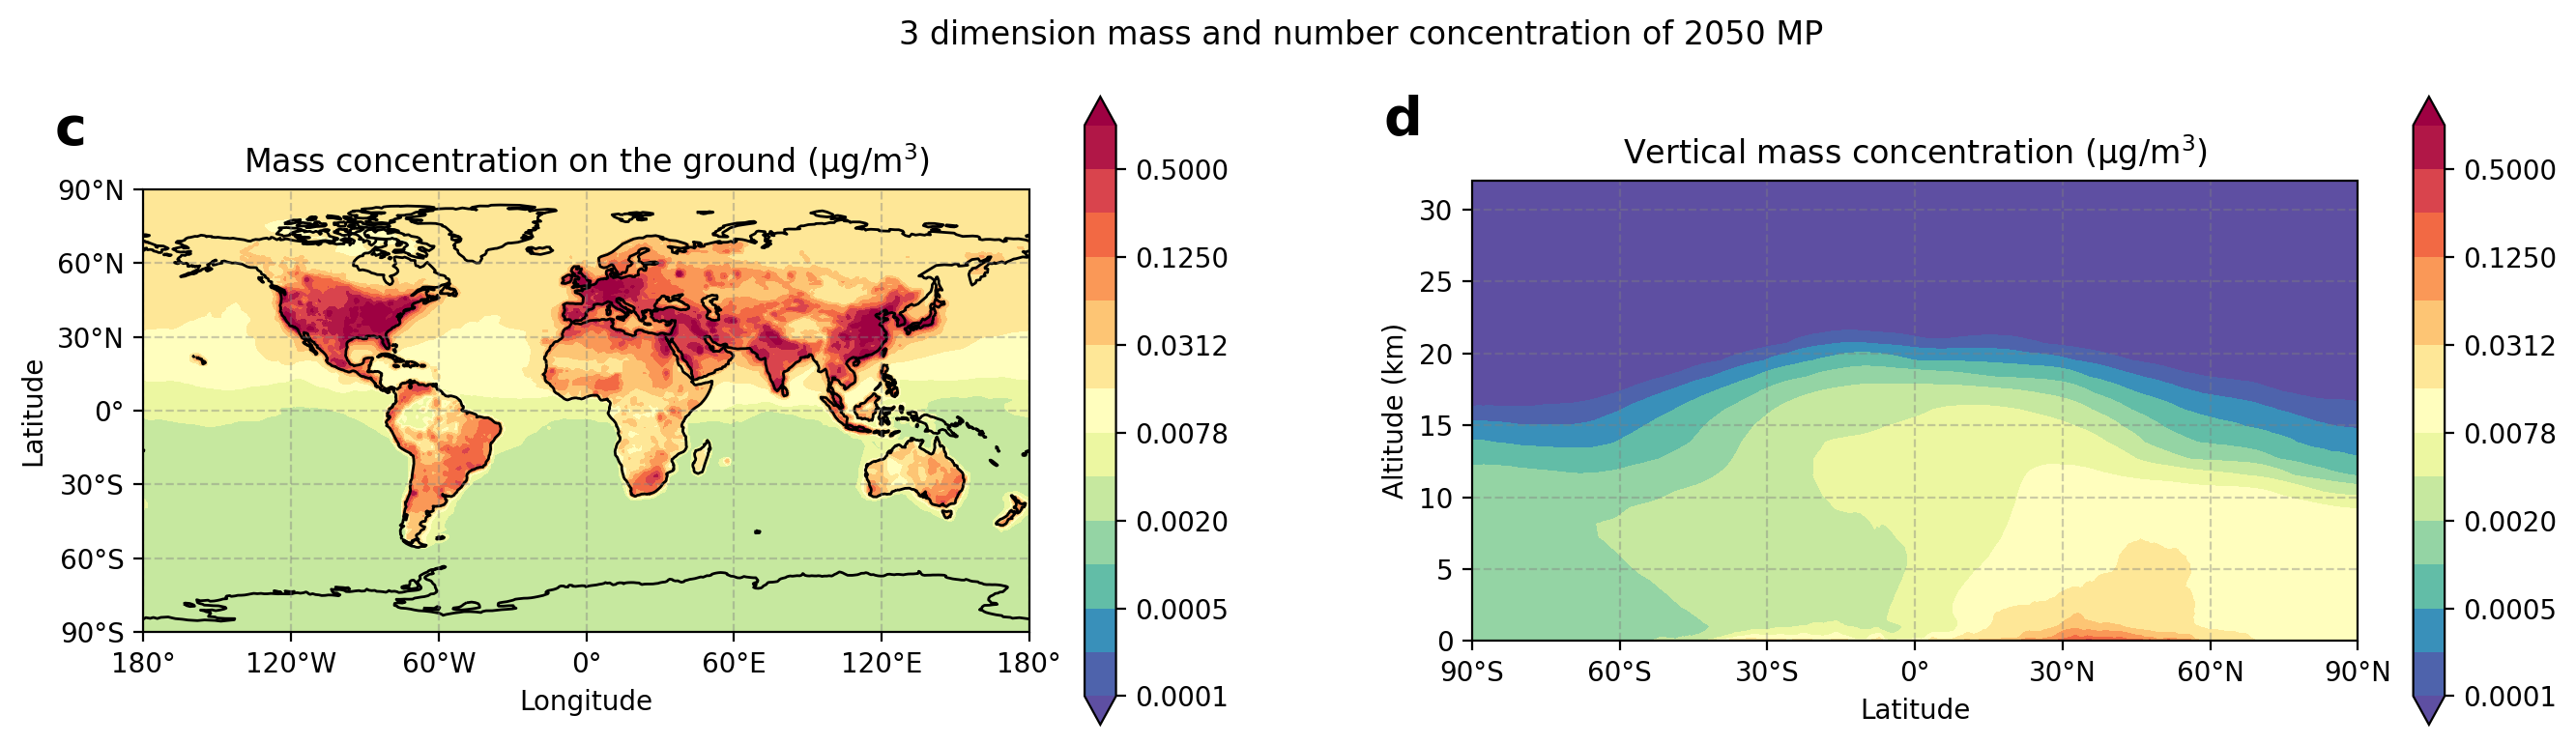

In [20]:

import matplotlib.ticker as mticker


colorbar_formatter = mticker.FormatStrFormatter('%.4f')

# Define the contour levels to use in plt.contourf
clevs=np.arange(-12,13,1)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(14,5),dpi=200)

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
cs=axs[0].contourf(MP1['lon'],MP1['lat'],data0,
                       levels=levs2,
                       locator=ticker.LogLocator(),
                      cmap = cm.get_cmap('Spectral_r'),
                      subplot_kws={'projection': ccrs.PlateCarree()},
                   #gist_ncar
                       extend='both')
        # Title each subplot with the name of the model
axs[0].set_title(f'Mass concentration on the ground (μg/m$^{3}$)')

        # Draw the coastines for each subplot
axs[0].coastlines()

        # Longitude labels
axs[0].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs[0].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
axs[0].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs[0].yaxis.set_major_formatter(lat_formatter)
axs[0].gridlines(draw_labels=False, color='grey', alpha=0.4, linestyle='--')
plt.colorbar(cs, ax=axs[0], format=colorbar_formatter)
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
axs[0].text(-0.1, 1.1, string.ascii_lowercase[2], transform=axs[0].transAxes, 
            size=20, weight='bold')




# cs=axs[1].contourf(MP11['lon'],MP11['lat'],data1,clev,

#                        cmap = Bella2,subplot_kws={'projection': ccrs.PlateCarree()},
#                        extend='both',)


#         # Title each subplot with the name of the model
# axs[1].set_title(f'Number concentration on the ground (MP/m$^{3}$)')

#         # Draw the coastines for each subplot
# axs[1].coastlines()

#         # Longitude labels
# axs[1].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
# lon_formatter = cticker.LongitudeFormatter()
# axs[1].xaxis.set_major_formatter(lon_formatter)

#         # Latitude labels
# axs[1].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
# lat_formatter = cticker.LatitudeFormatter()
# axs[1].yaxis.set_major_formatter(lat_formatter)
# axs[1].gridlines(draw_labels=False, color='grey', alpha=0.4, linestyle='--')
# axs[1].set_xlabel("Longitude")
# axs[1].set_ylabel("Latitude")
# plt.colorbar(cs, ax=axs[1])
# axs[1].text(-0.1, 1.1, string.ascii_lowercase[5], transform=axs[1].transAxes, 
#             size=20, weight='bold')

cs=axs[1].contourf(MP11['lat'][::-1],al[::-1], np.rot90(data2,2),data2,
                       levels=levs2,
                       locator=ticker.LogLocator(),
                      cmap = cm.get_cmap('Spectral_r'),
                   subplot_kws={'projection': ccrs.PlateCarree()},
                   #gist_ncar
                       extend='both'
                      )
axs[1].set_title(f'Vertical mass concentration (μg/m$^{3}$)')

        # Draw the coastines for each subplot


        # Longitude labels
axs[1].set_xticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs[1].xaxis.set_major_formatter(lat_formatter)

        # Latitude labels
axs[1].set_yticks([0,5,10,15,20,25,30])
axs[1].gridlines(draw_labels=False, color='grey', alpha=0.4, linestyle='--')

axs[1].set_aspect(1 / np.cos(np.deg2rad(70)))
plt.colorbar(cs, ax=axs[1], format=colorbar_formatter)
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Altitude (km)")
axs[1].text(-0.1, 1.1, string.ascii_lowercase[3], transform=axs[1].transAxes, 
            size=20, weight='bold')

# cs=axs[3].contourf(MP11['lat'][::-1],al[::-1], np.rot90(data3,2),clev,

#                        cmap = Bella2,
#                        extend='both'
#                       )
# axs[3].set_title(f'Vertical number concentration (MP/m$^{3}$)')

#         # Draw the coastines for each subplot


#         # Longitude labels
# axs[3].set_xticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
# lat_formatter = cticker.LatitudeFormatter()
# axs[3].xaxis.set_major_formatter(lat_formatter)

#         # Latitude labels
# axs[3].set_yticks([0,5,10,15,20,25,30])
# axs[3].gridlines(draw_labels=False, color='grey', alpha=0.4, linestyle='--')

# axs[3].set_aspect(1 / np.cos(np.deg2rad(70)))
# plt.colorbar(cs, ax=axs[3])
# axs[3].set_xlabel("Latitude")
# axs[3].set_ylabel("Altitude (km)")
# axs[3].text(-0.1, 1.1, string.ascii_lowercase[7], transform=axs[3].transAxes, 
#             size=20, weight='bold')


# Delete the unwanted axes
#for i in [7,8]:
 #   fig.delaxes(axs[i])

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# Draw the colorbar
#cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

# Add a big title at the top
plt.suptitle('3D mass concentration of microplastic in the year of 2050')
# plt.savefig('./image/concentration2050.png')

**Deposition**